# Building a neural-network with Keras
**Author: Furong Guo**

(Colab is recommended)

First, import prerequisites

In [43]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils

In [44]:
%matplotlib inline

In [45]:
(x_train_original, y_train_original), (x_test_original, y_test_original) = fashion_mnist.load_data()
print('the original shape of x_train: ' + str(x_train_original.shape))
print('the original shape of x_test: ' + str(x_test_original.shape))

the original shape of x_train: (60000, 28, 28)
the original shape of x_test: (10000, 28, 28)


Let's check what the samples are like.

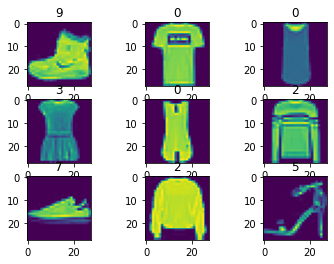

In [47]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train_original[i], interpolation= None)
  plt.title(str(y_train_original[i]))

# Only fully connected

## Step 1: Format the data for training

For input values

In [48]:
x_train = x_train_original.reshape(60000, 784)
x_test = x_test_original.reshape(10000, 784)
x_train.astype('float32')
x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
print('shape of x_train:' + str(x_train.shape))
print('shape of x_test:' + str(x_test.shape))

shape of x_train:(60000, 784)
shape of x_test:(10000, 784)


For output labels

In [49]:
num_classes = 10
y_train = np_utils.to_categorical(y_train_original, num_classes= num_classes, dtype='float32')
y_test = np_utils.to_categorical(y_test_original, num_classes= num_classes, dtype='float32')

## Step 2: Build the model

In [50]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2)) 
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(10, activation='softmax'))

## Step 3: Compile the model

In [51]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Step 4: Train the model

In [52]:
model.fit(x= x_train, y= y_train, batch_size= 128, epochs= 10, verbose= 1, validation_data= (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.6877 - accuracy: 0.7543 - val_loss: 0.4162 - val_accuracy: 0.8449
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3892 - accuracy: 0.8543 - val_loss: 0.4153 - val_accuracy: 0.8448
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3533 - accuracy: 0.8697 - val_loss: 0.3670 - val_accuracy: 0.8667
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3276 - accuracy: 0.8784 - val_loss: 0.3552 - val_accuracy: 0.8692
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3092 - accuracy: 0.8838 - val_loss: 0.3465 - val_accuracy: 0.8747
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3016 - accuracy: 0.8882 - val_loss: 0.3243 - val_accuracy: 0.8786
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2848 - accuracy: 0.8915 - val_loss: 0.3279 - val_accuracy: 0.8799
Epoch 

## Evaluate the performance

In [53]:
score = model.evaluate(x= x_test, y = y_test, verbose= 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.3186170756816864
Test accuracy: 0.8858000040054321


In [54]:
predicted_classes = model.predict_classes(x_test, batch_size=128, verbose=0)
correct_indices = np.nonzero(predicted_classes == y_test_original)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test_original)[0]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


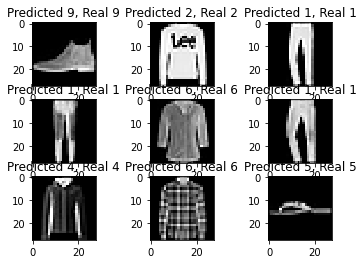

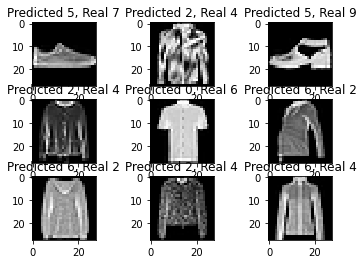

In [55]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test_original[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Real {}".format(predicted_classes[correct], y_test_original[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Real {}".format(predicted_classes[incorrect], y_test_original[incorrect]))

It seems sane.


# CNN

## Step 1: Format the data for training

In [56]:
x_train_cnn = x_train_original.reshape(60000, 28, 28, 1) / 255
x_test_cnn = x_test_original.reshape(10000, 28, 28, 1) / 255
num_classes = 10
y_train_cnn = np_utils.to_categorical(y_train_original, num_classes= num_classes, dtype='float32')
y_test_cnn = np_utils.to_categorical(y_test_original, num_classes= num_classes, dtype='float32')

## Step 2: Build the model

In [57]:
model_cnn = Sequential()
model_cnn.add(Input(shape=(28, 28, 1)))
model_cnn.add(Conv2D(filters = 3, kernel_size = 20, activation = 'relu', padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(8, 8),strides=(1, 1), padding='same'))
model_cnn.add(Conv2D(filters = 6, kernel_size = 8, activation = 'relu', padding='same'))
model_cnn.add(MaxPooling2D(pool_size=(4, 4),strides=(1, 1), padding='same'))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

## Step 3: Compile the model

In [58]:
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Step 4: Train the model

In [60]:
model_cnn.fit(x= x_train_cnn, y= y_train_cnn, batch_size= 128, epochs= 10, verbose= 1, validation_data= (x_test_cnn, y_test_cnn))

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.5765 - accuracy: 0.7921 - val_loss: 0.4649 - val_accuracy: 0.8324
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.4106 - accuracy: 0.8521 - val_loss: 0.4245 - val_accuracy: 0.8480
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3725 - accuracy: 0.8639 - val_loss: 0.3918 - val_accuracy: 0.8593
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3482 - accuracy: 0.8729 - val_loss: 0.3870 - val_accuracy: 0.8622
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3331 - accuracy: 0.8789 - val_loss: 0.3836 - val_accuracy: 0.8582
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3178 - accuracy: 0.8835 - val_loss: 0.3763 - val_accuracy: 0.8670
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.3104 - accuracy: 0.8863 - val_loss: 0.3402 - val_accuracy: 0.8777
Epoch 

## Evaluate the performance

In [61]:
score_cnn = model_cnn.evaluate(x= x_test_cnn, y = y_test_cnn, verbose= 0)
print('Test score:', score_cnn[0])
print('Test accuracy:', score_cnn[1])

Test score: 0.34337282180786133
Test accuracy: 0.8766999840736389


In [62]:
predicted_classes_cnn = model_cnn.predict_classes(x_test_cnn, batch_size=128, verbose=0)
correct_indices_cnn = np.nonzero(predicted_classes_cnn == y_test_original)[0]
incorrect_indices_cnn = np.nonzero(predicted_classes_cnn != y_test_original)[0]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


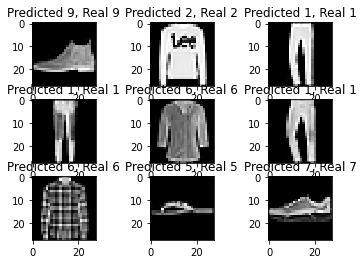

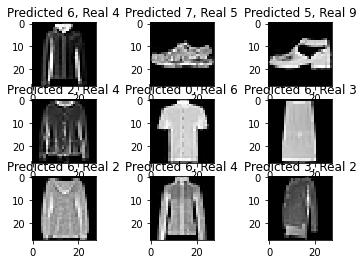

In [63]:
plt.figure()
for i, correct in enumerate(correct_indices_cnn[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test_original[correct], cmap='gray', interpolation='none')
    plt.title("Predicted {}, Real {}".format(predicted_classes_cnn[correct], y_test_original[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices_cnn[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test_cnn[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Real {}".format(predicted_classes_cnn[incorrect], y_test_original[incorrect]))